<a href="https://colab.research.google.com/github/Mustasheep/Central-Park-Squirrel-Census/blob/main/Central_Park_Squirrel_Census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Central Park Squirrel Census

Informações:
- Esta tabela contém dados de esquilos para cada um dos 3.023 avistamentos, incluindo coordenadas de localização, idade, cor primária e secundária do pelo, elevação, atividades, comunicações e interações entre esquilos e com humanos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
squirrel_data = pd.read_csv('/content/drive/MyDrive/CSVs/2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')
squirrel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

Com as informações acima, pode-se notar que:

- O dataset possui 31 colunas e 3023 linhas
- Se trata de dados sobre esquilos e apresenta diversas características e informações.

In [3]:
squirrel_data.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,True,me,POINT (-73.9570437717691 40.794850940803904)
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581)
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755)
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,NaN,...,True,False,False,False,False,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163)


---------------------
## Limpeza e Pré-processamento de Dados (Objetivos Iniciais):

1. **Limpeza de strings:** Isolar colunas que serão desnecessárias para o projeto.

2. **Lidando com valores ausentes:** Detectar presença de valores ausentes (`null`, `NaN`, espaços em branco).

3. **Formato de data:** A coluna "Date" está no formato `MMDDYYYY`.

4. **Variáveis booleanas:** Muitas colunas são booleanas (verdadeiro/falso).



In [4]:
# Isolar colunas desnecessárias para o projeto a seguir e utilizar apenas o necessário.
new_squirrel_data = squirrel_data[['X', 'Y', 'Unique Squirrel ID', 'Shift', 'Date', 'Age', 'Combination of Primary and Highlight Color', 'Running', 'Chasing', 'Climbing', 'Eating', 'Foraging']]
new_squirrel_data.head()

,X,Y,Unique Squirrel ID,Shift,Date,Age,Combination of Primary and Highlight Color,Running,Chasing,Climbing,Eating,Foraging
0,-73.956134,40.794082,37F-PM-1014-03,PM,10142018,NaN,+,False,False,False,False,False
1,-73.957044,40.794851,37E-PM-1006-03,PM,10062018,Adult,Gray+Cinnamon,True,False,False,False,False
2,-73.976831,40.766718,2E-AM-1010-03,AM,10102018,Adult,Cinnamon+,False,False,True,False,False
3,-73.975725,40.769703,5D-PM-1018-05,PM,10182018,Juvenile,Gray+,False,False,True,False,False
4,-73.959313,40.797533,39B-AM-1018-01,AM,10182018,NaN,+,False,False,False,False,False


In [6]:
# Renomeando a coluna "Combination of Primary and Highlight Color" para um nome mais curto e removendo linhas com "+"
new_squirrel_data = new_squirrel_data.loc[new_squirrel_data['Combination of Primary and Highlight Color'] != '+']
new_squirrel_data = new_squirrel_data.rename(columns={'Combination of Primary and Highlight Color': 'Fur Color'})

In [5]:
# Identificar valroes duplicados
id_count = squirrel_data['Unique Squirrel ID'].value_counts()
id_count.head(10)

,count
Unique Squirrel ID,
37E-PM-1006-03,2
1F-AM-1010-04,2
4C-PM-1010-05,2
40B-AM-1019-06,2
7D-PM-1010-01,2
32A-AM-1018-02,1
18C-PM-1018-04,1
35D-PM-1013-05,1
41B-PM-1014-03,1


_Os valores duplicado são apenas 5 para uma margem de 3000 valores, o que não afetará no meu projeto._

In [7]:
# Unir as colunas de atividades para uma única coluna categórica nomeada "Activities"
categories = ['Running', 'Chasing', 'Climbing', 'Eating', 'Foraging']
boolean_cols = ['Running', 'Chasing', 'Climbing', 'Eating', 'Foraging']

new_squirrel_data['Activities'] = [', '.join(cat for cat, val in zip(categories, row) if val) for row in new_squirrel_data[boolean_cols].values]
new_squirrel_data = new_squirrel_data.drop(columns=boolean_cols)
new_squirrel_data['Activities'].value_counts()

,count
Activities,
Foraging,847
Running,344
Climbing,341
Eating,287
"Eating, Foraging",251
,174
Chasing,126
"Running, Foraging",109
"Running, Climbing",71


In [8]:
# Substituindo valores vazios para "Stopped"
new_squirrel_data['Activities'] = new_squirrel_data['Activities'].replace(to_replace='', value='Stopped')

In [9]:
# Formatar a data para valores mais acessíveis para apresentar em gráficos
new_squirrel_data['Date'] = pd.to_datetime(new_squirrel_data['Date'], format='%m%d%Y')
new_squirrel_data['Date'] = new_squirrel_data['Date'].dt.strftime('%d/%m/%Y')
new_squirrel_data.head()

,X,Y,Unique Squirrel ID,Shift,Date,Age,Fur Color,Activities
1,-73.957044,40.794851,37E-PM-1006-03,PM,06/10/2018,Adult,Gray+Cinnamon,Running
2,-73.976831,40.766718,2E-AM-1010-03,AM,10/10/2018,Adult,Cinnamon+,Climbing
3,-73.975725,40.769703,5D-PM-1018-05,PM,18/10/2018,Juvenile,Gray+,Climbing
5,-73.956570,40.790256,33H-AM-1019-02,AM,19/10/2018,Juvenile,Gray+Cinnamon,Stopped
6,-73.971974,40.769305,6G-PM-1020-02,PM,20/10/2018,Adult,Gray+,"Running, Chasing"


In [11]:
# Analisando versão final do novo dataset
new_squirrel_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2968 entries, 1 to 3022
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   X                   2968 non-null   float64
 1   Y                   2968 non-null   float64
 2   Unique Squirrel ID  2968 non-null   object 
 3   Shift               2968 non-null   object 
 4   Date                2968 non-null   object 
 5   Age                 2867 non-null   object 
 6   Fur Color           2968 non-null   object 
 7   Activities          2968 non-null   object 
dtypes: float64(2), object(6)
memory usage: 208.7+ KB


---------------------
## II. Análise Exploratória de Dados (Objetivos Intermediários):

1. **Distribuição de cores de pelagem:**  visualizar a frequência de cada cor de pelagem primária e secundária.  Identificar as cores mais comuns.

2. **Idade dos esquilos:**  Analisar a distribuição de idade.  Há uma diferença significativa entre a proporção de esquilos adultos e jovens?

3. **Atividades dos esquilos:**  Analisar a frequência de diferentes atividades (Running, Chasing, Climbing, etc.).  Há correlações entre as atividades? Quais atividades são mais comuns em esquilos adultos versus jovens?

4. **Localização:** Uso de coordenadas para criar um mapa da localização dos esquilos.  Existem áreas mais densamente povoadas por esquilos?  Há relação entre a localização e a cor da pelagem ou atividade?

5. **Correlações entre variáveis:** Explorar possíveis correlações entre variáveis usando métodos estatísticos e matrizes de correlação.

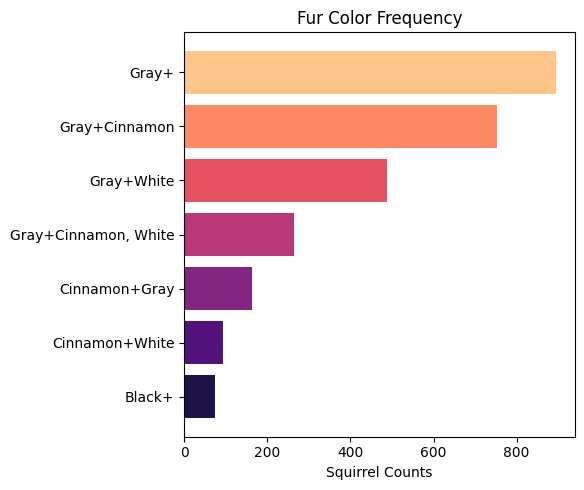

In [41]:
# Visualizar a frequência de cor das pelagens
top_7_colors = new_squirrel_data['Fur Color'].value_counts().head(7)
sorted_index = top_7_colors.sort_values().index
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.barh(sorted_index, top_7_colors[sorted_index], color=sns.color_palette("magma", 7))
plt.title('Fur Color Frequency')
plt.ylabel('')
plt.xlabel('Squirrel Counts')

plt.tight_layout()
plt.show()